In [58]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## PPI Equilibrium Abundances

In [40]:
import numpy as np

def L(A1,A2,Z1,Z2,S,T):
    """
    No good, lots of numerical overflow
    """
    k = 1.38e-16
    A = A1*A2/float(A1+A2)
    
    e0 = 1.22 * (Z1**2 * Z2**2 * A * (T*1e-6)**2)**(1./3)
        
    tau = 3 * e0 / (k*T)
    
    return (S * .72e-18 * np.exp(-tau) * tau**2)/(A*Z1*Z2)

In [41]:
L( 1.,1.,1.,1., 3.8e-22, 1.5e7) / (2*L( 2.,1.,1.,1., 2.5e-4 ,1.5e7 # bad

C:\Users\alex\Anaconda\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


nan

In [45]:
def tau(A1,A2,Z1,Z2,T):
    k = 1.38e-16
    A = A1*A2/float(A1+A2)
    e0 = 1.22 * (Z1**2 * Z2**2 * A * (T*1e-6)**2)**(1./3)
    return 3 * e0 / (k*T)

k = 1.38e-16
T = 1.5e7
t1 = tau(1,1,1,1,T)
t2 = tau(1,2,1,1,T)
S1 = 3.8e-22
S2 = 2.5e-4

(t1/t2)**2 * (S1/(2*S2)) * np.exp(-(t1+t2)/(k*T)) # also bad

0.0

# Helium Flash

In [47]:
def he_flash(T0,rho,Y,dt,m=1.):
    """
    Basic Euler integrator to simulate a constant density
    degenerate star just prior to the helium flash
    """
    
    mp = 1.672e-24
    me = 9.109e-28
    k = 1.38e-16
    c = 3e10
    hb = 1.0546e-27
    pi = np.pi
    
    #V = m/rho
    #N = m / (6.646e-24)
    #Ef = ( hb**2 / (2*me) ) * (  3* pi*pi *N /V)**(2./3.) 
    #x = np.sqrt(2*me*Ef) / (me *c)
    
    x = (rho/2e6)**(1./3)
    
    print x
    print (1e-8 * T0**1.5)
    
    T=T0
    t = 0
    _T = []
    _t = []
    _cve = []
    _cvhe = []
    _dE = []
    
    try:
    
        while rho > (1e-8 * T**1.5): # stop before the star ceases to be degenerate

            cv_e = 1.35e5 * T * x * np.sqrt((1+x*x)) / rho
            cv_he = 3*k/(4*mp)

            cv = cv_e + cv_he

            T9 = T*1e-9

            dE = dt * m * 5.1e8 * rho**2 * Y**3 *np.exp(-4.4027/T9) / T9**3 

            dT = dE/(m*cv)

            _T.append(T)
            _t.append(t)
            _cve.append(cv_e)
            _cvhe.append(cv_he)
            _dE.append(dE)

            T += dT
            t += dt
                       
    
    except:
        pass
        
    return np.array(_t), np.array(_cve),np.array(_cvhe), np.array(_dE), np.array(_T)


In [48]:
t,cve,cvhe,dE,T = he_flash(T0=1.5e8,rho=2e5,Y=.25,dt=100)

0.464158883361
18371.1730709


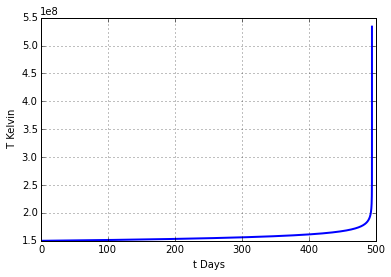

In [49]:
xlabel('t Days')
ylabel(' T Kelvin')
grid(True)
plot(t/(24*3600.),T,linewidth=2)

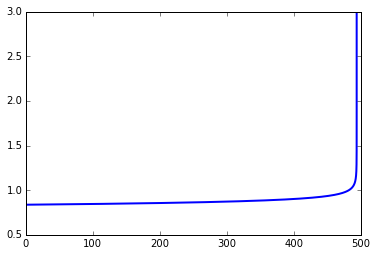

In [50]:
plot(t/(24*3600.),cve/cvhe,linewidth=2)

# Nuclear Statistical Equilibrium

In [22]:
from scipy.optimize import fsolve

def frac(T9):
    
    rho = 1e7
    mni = 9.289e-23
    mhe = 6.46e-24
    k = 1.38e-16
    hb = 1.0546e-27
    c = 3e10

    T = T9*1e9
    
    d = 2*np.pi*hb**2
    
    f=(mni / 2.2e-234 ) * np.exp(  (mni-14*mhe)*c**2/(k*T)  ) * (mni*k*T/d)**(-1.5) * (mhe*k*T/d)**(21)
    
    F = lambda X4: X4**14 - (1-X4)*f
    
    X4 = fsolve(F,.5)
    
    return X4

In [23]:
T9 = np.linspace(4.5,6.5,10)
X4 = []
for _T9 in T9:
    X4.append(frac(_T9)) # bad

C:\Users\alex\Anaconda\lib\site-packages\ipykernel\__main__.py:16: RuntimeWarning: overflow encountered in exp
C:\Users\alex\Anaconda\lib\site-packages\ipykernel\__main__.py:16: RuntimeWarning: overflow encountered in double_scalars
C:\Users\alex\Anaconda\lib\site-packages\ipykernel\__main__.py:18: RuntimeWarning: invalid value encountered in power
C:\Users\alex\Anaconda\lib\site-packages\scipy\optimize\minpack.py:237: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


# Zero Metallicity Stars

In [51]:
import mesa_reader

l = mesa_reader.MesaLogDir('LOGS_solar')

In [52]:
T_c = []
rho_c = []
t = []

# loop over all the profiles saved for the run, and grab
# the core temperature and density
for idx in l.profile_numbers:
    
    data = l.profile_data(profile_number=idx)
    
    t.append(data.star_age)
    T_c.append(data.data('T')[0])
    rho_c.append(data.data('Rho')[0])
    
t = np.array(t)/1e6


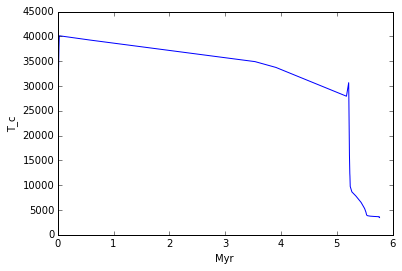

In [59]:
xlabel('Myr')
ylabel('T_c')
plot(t,T_c)

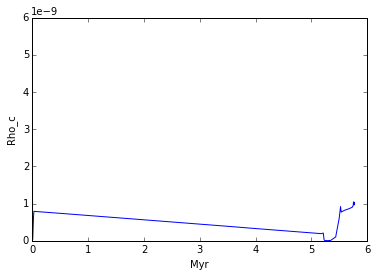

In [60]:
xlabel('Myr')
ylabel('Rho_c')
plot(t,rho_c)